## Final Project Submission

Please fill out:
* Student name: Matthew Gittings 
* Student pace: full time
* Scheduled project review date/time: 03/11/2022
* Instructor name: Praveed Gowtham
* Blog post URL:


In [91]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import csv
import numpy 

Importing in first data file bom.movie_gross.csv

In [92]:
movie_gross= pd.read_csv('zippedData/bom.movie_gross.csv')

In [93]:
movie_gross.shape

(3387, 5)

In [94]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [95]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Deleteing cells from the movie_gross file which do not have value.

In [97]:
movie_gross.dropna(inplace=True)

Changing 

In [98]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')

In [99]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(float)

In [100]:
total_gross = movie_gross['foreign_gross'] + movie_gross['domestic_gross']

In [101]:
movie_gross.insert(4, "total_gross",total_gross, True)

In [102]:
movie_gross.sort_values(by='total_gross',ascending=False)

,title,studio,domestic_gross,foreign_gross,total_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,2015
3080,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,2018
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,1.341500e+09,2011
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2017
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700.0,13200.0,2.190000e+04,2011
322,The Thorn in the Heart,Osci.,7400.0,10500.0,1.790000e+04,2010
1110,Cirkus Columbia,Strand,3500.0,9500.0,1.300000e+04,2012
715,Aurora,CGld,5700.0,5100.0,1.080000e+04,2011


In [103]:
# Getting some NaN at the bottom for domestic gross

In [104]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [105]:
movie_budgets.shape

(5782, 6)

In [106]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [107]:
movie_budgets = movie_budgets.rename(columns={'movie':'title'})

In [108]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')

In [109]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [110]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')

In [111]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)
movie_budgets['worldwide_gross'].head()

0    2.776345e+09
1    1.045664e+09
2    1.497624e+08
3    1.403014e+09
4    1.316722e+09
Name: worldwide_gross, dtype: float64

In [112]:
roi = movie_budgets['worldwide_gross']/ movie_budgets['production_budget']
roi

0         6.532577
1         2.546673
2         0.427892
3         4.243841
4         4.153696
           ...    
5777      0.000000
5778     40.082500
5779      0.267600
5780      0.000000
5781    164.582727
Length: 5782, dtype: float64

In [113]:
prod_budget = movie_budgets['production_budget']

In [114]:
budget = movie_budgets['production_budget'].sort_values(ascending=False)

In [115]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv')

In [116]:
title_basics = title_basics.rename(columns={'primary_title':'title','start_year':'year'})

In [117]:
title_basics.head()

,tconst,title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [118]:
title_basics['genres'].value_counts()

Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Adventure,Crime,Music          1
History,Romance,Western        1
Animation,Music,Romance        1
Adventure,History,Music        1
Action,Sport,Thriller          1
Name: genres, Length: 1085, dtype: int64

In [119]:
title_basics.shape

(146144, 6)

In [120]:
movie_gross.shape

(2007, 6)

In [121]:
outer_merged = movie_gross.merge(title_basics,on=["title","year"])

In [122]:
outer_merged = outer_merged.sort_values(by='total_gross',ascending=False)

In [123]:
outer_merged

,title,studio,domestic_gross,foreign_gross,total_gross,year,tconst,original_title,runtime_minutes,genres
741,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
1148,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi"
1017,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2017,tt2527336,Star Wars: Episode VIII - The Last Jedi,152.0,"Action,Adventure,Fantasy"
1149,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi"
478,Frozen,BV,400700000.0,875700000.0,1.276400e+09,2013,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...,...,...,...
178,Freakonomics,Magn.,101000.0,16400.0,1.174000e+05,2010,tt1152822,Freakonomics,93.0,Documentary
179,Band Baaja Baaraat,Yash,43800.0,60700.0,1.045000e+05,2010,tt1610452,Band Baaja Baaraat,139.0,"Comedy,Drama,Romance"
180,As Good as Dead,First,2000.0,53600.0,5.560000e+04,2010,tt1294136,As Good as Dead,100.0,"Crime,Thriller"
181,Inhale,IFC,4100.0,51000.0,5.510000e+04,2010,tt1196340,Inhale,83.0,"Drama,Thriller"


In [124]:
bool_mask = outer_merged['genres'].value_counts()

In [125]:
bool_mask = bool_mask.astype(int)

In [126]:
mask = bool_mask > 5

In [127]:
bool_mask = bool_mask[mask]

<AxesSubplot:>

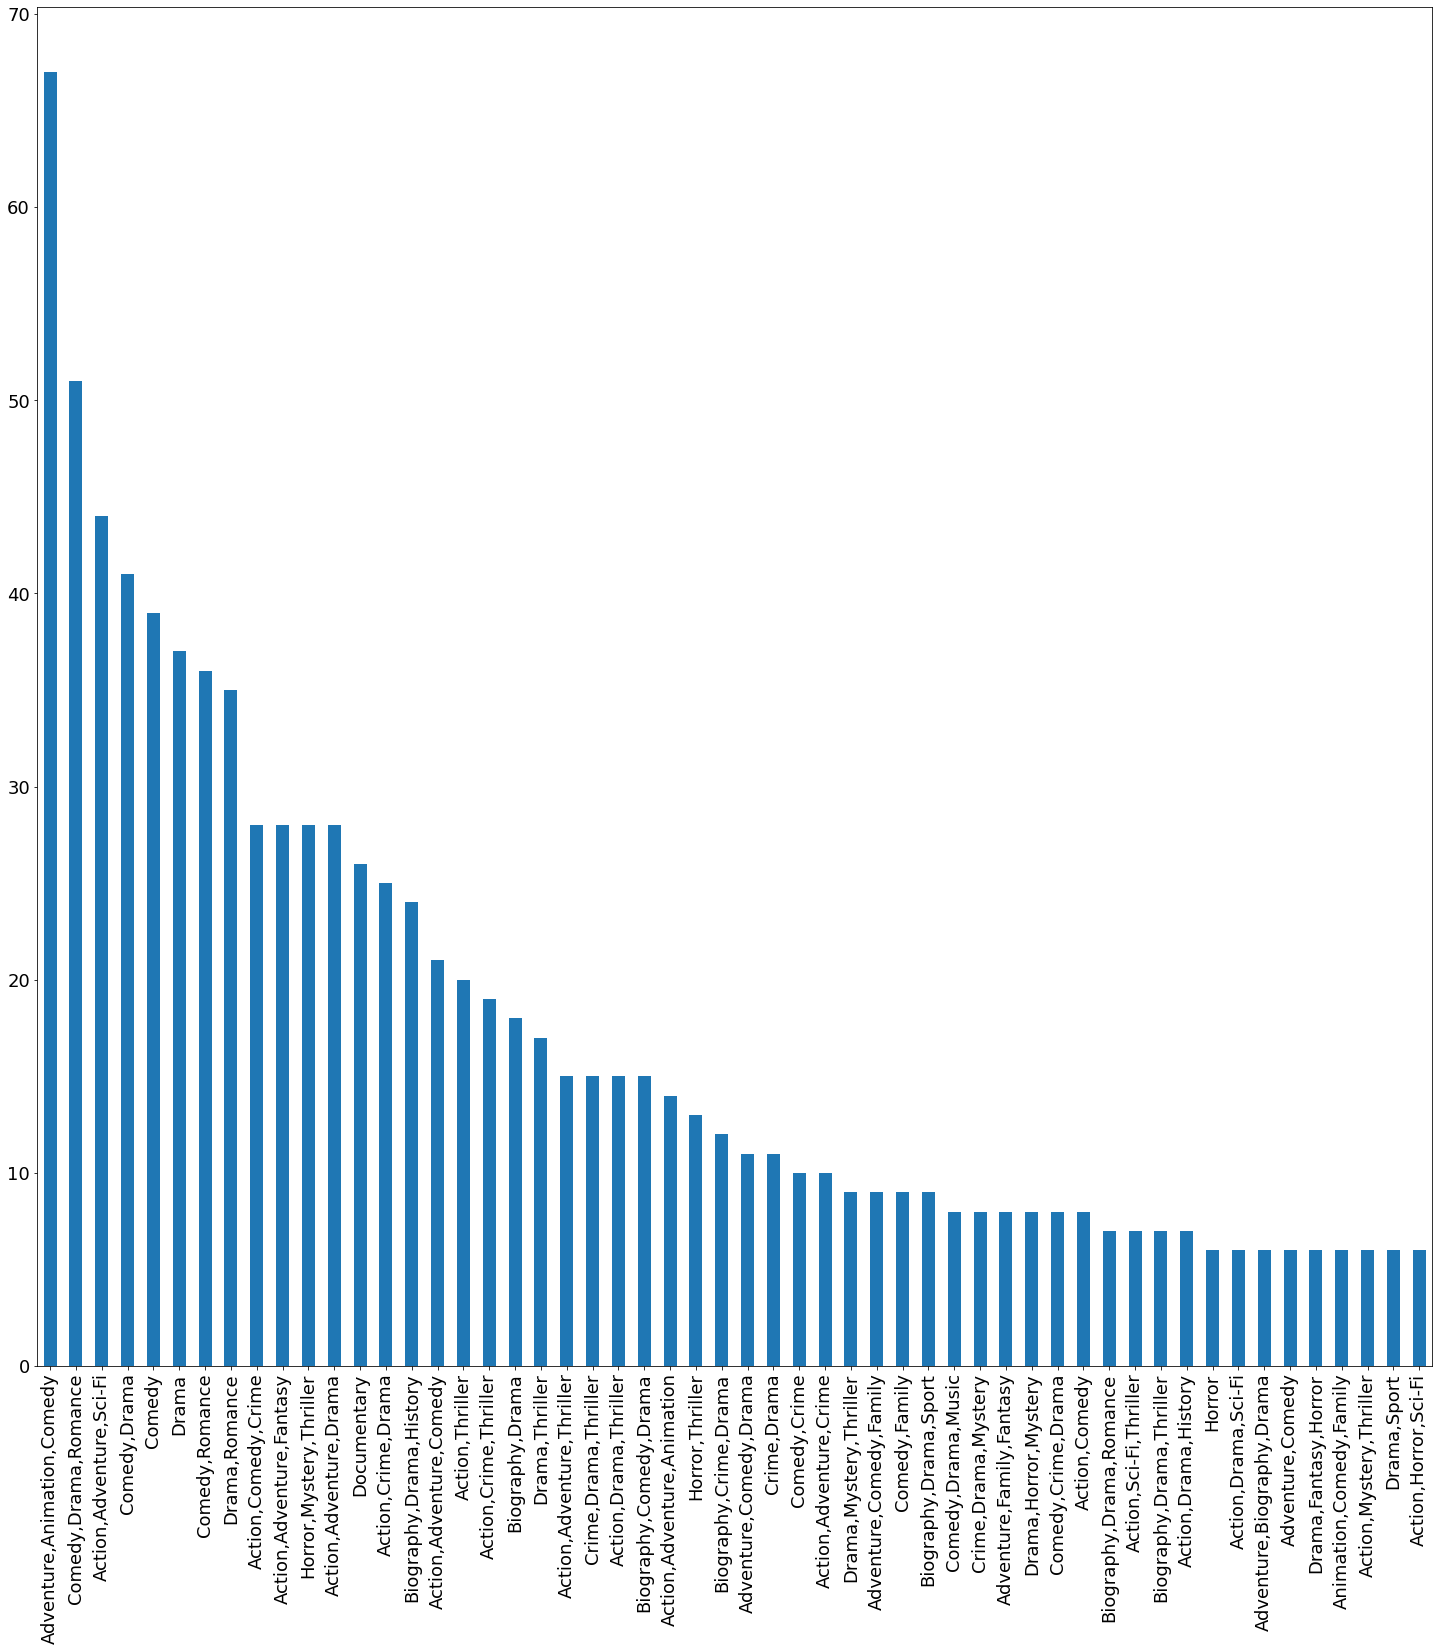

In [128]:
bool_mask.plot.bar(title='',x='Genres',fontsize=18,rot=90,figsize=(25,25))

<AxesSubplot:>

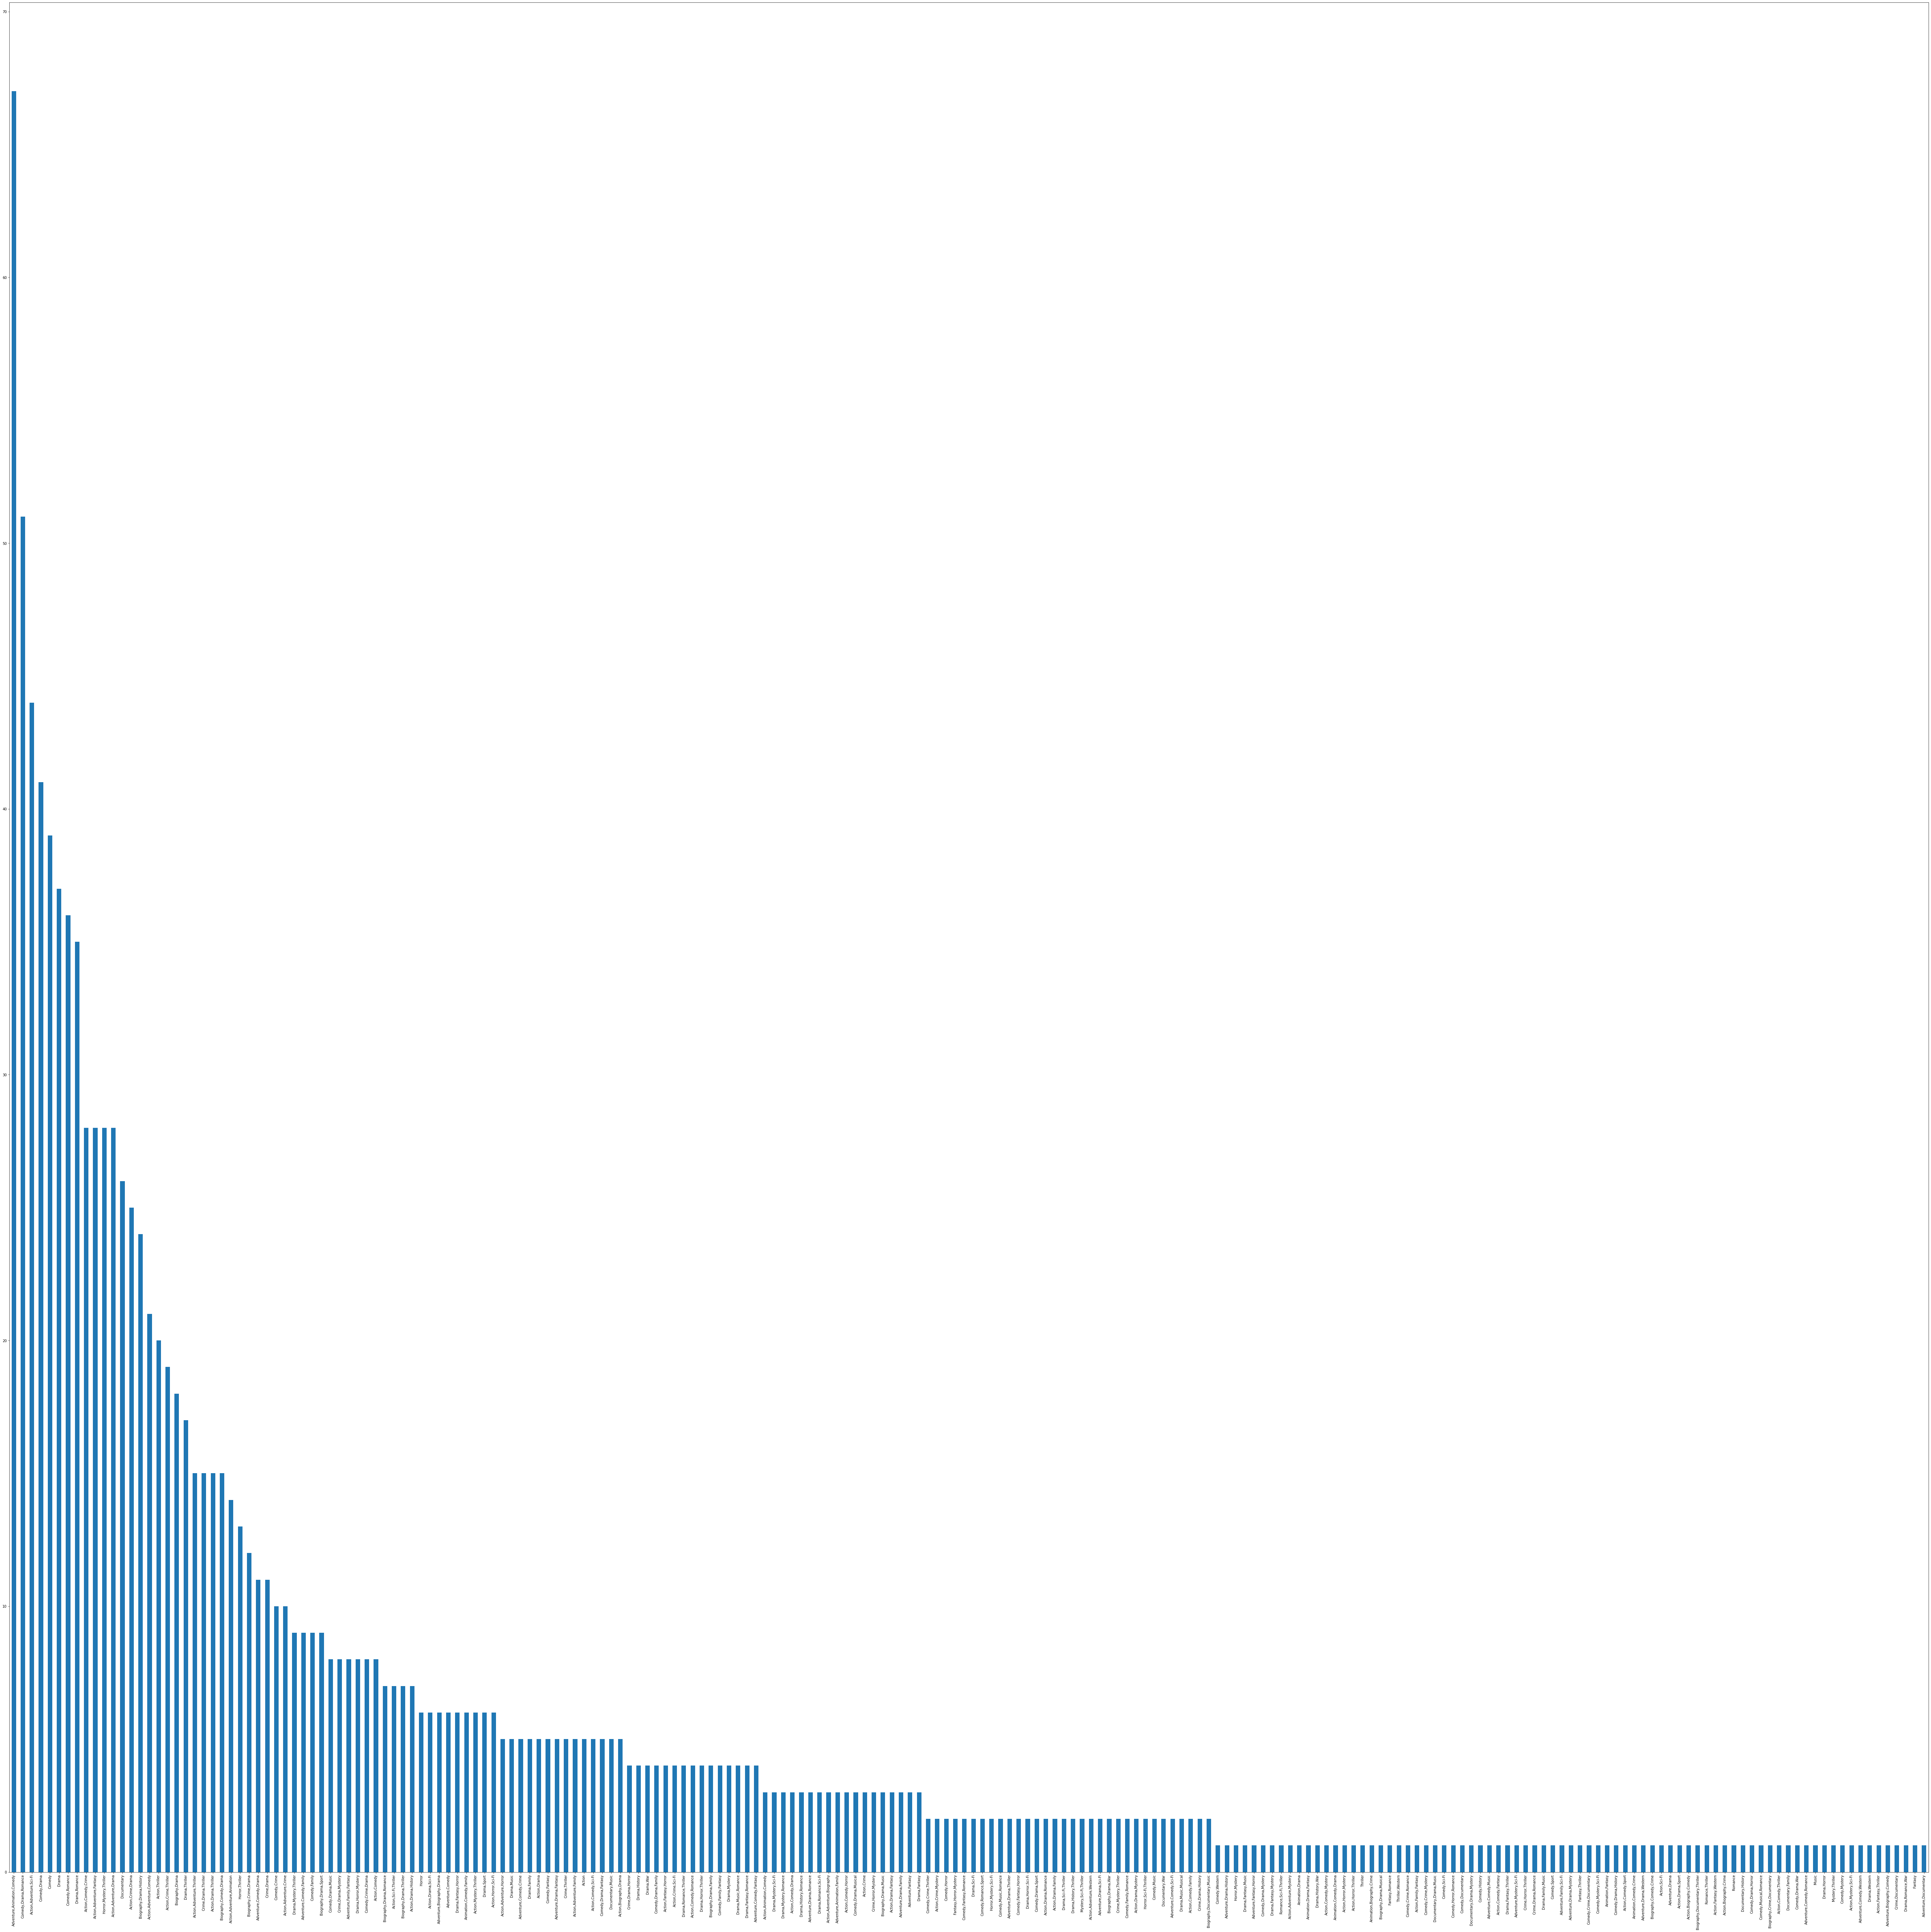

In [129]:
outer_merged['genres'].value_counts().plot.bar(figsize=(100,100))

In [130]:
outer_merged.insert(5, "roi",roi, True)

In [131]:
outer_merged.insert(6, "production_budget",prod_budget, True)

In [132]:
outer_merged

,title,studio,domestic_gross,foreign_gross,total_gross,roi,production_budget,year,tconst,original_title,runtime_minutes,genres
741,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,0.842190,70000000.0,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
1148,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,1.109797,50000000.0,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi"
1017,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2.346823,55000000.0,2017,tt2527336,Star Wars: Episode VIII - The Last Jedi,152.0,"Action,Adventure,Fantasy"
1149,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,5.277891,50000000.0,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi"
478,Frozen,BV,400700000.0,875700000.0,1.276400e+09,0.227400,90000000.0,2013,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...,...,...,...,...,...
178,Freakonomics,Magn.,101000.0,16400.0,1.174000e+05,2.066959,150000000.0,2010,tt1152822,Freakonomics,93.0,Documentary
179,Band Baaja Baaraat,Yash,43800.0,60700.0,1.045000e+05,2.650009,150000000.0,2010,tt1610452,Band Baaja Baaraat,139.0,"Comedy,Drama,Romance"
180,As Good as Dead,First,2000.0,53600.0,5.560000e+04,3.272506,150000000.0,2010,tt1294136,As Good as Dead,100.0,"Crime,Thriller"
181,Inhale,IFC,4100.0,51000.0,5.510000e+04,3.227742,150000000.0,2010,tt1196340,Inhale,83.0,"Drama,Thriller"


<AxesSubplot:xlabel='total_gross', ylabel='roi'>

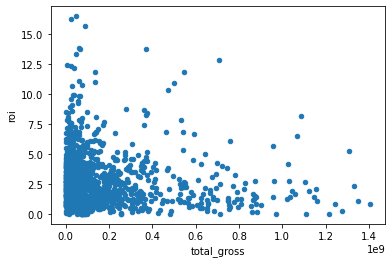

In [133]:
outer_merged.plot.scatter(x='total_gross',y='roi')

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

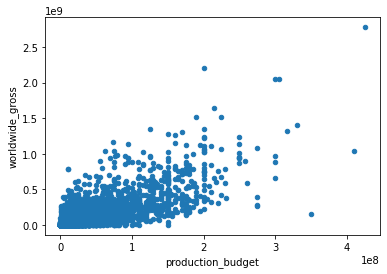

In [134]:
movie_budgets.plot.scatter(x='production_budget',y='worldwide_gross')

In [135]:
#clustering near the bottom left, yet a more positive correlation toward a larger budget having a higher ROI